In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import whole_upleft,next_state, box_cornel, feasible_location

'''#initialize
container=np.zeros((20,20))
#inputdata=generationg_input(N_epi=1)[0]

box_LB=[[10,10],[7,3],[1,2]]
c_ct=container.copy()
f_upleft=[]#corner_list=[]
f_upleft += whole_upleft(*box_cornel([0,0],20,20),1,2)#corner_list+=cornel([0,0],10,10)

#box 1
c_ct[0:10,0:10]=1
f_upleft += whole_upleft(*box_cornel([0,0],10,10),1,2)#corner_list+=cornel([0,0],10,10)
#box 2
c_ct[-7:20,-3:20]=1
f_upleft += whole_upleft(*box_cornel([13,17],7,3),1,2)#corner_list+=cornel([13,17],7,3)

#remove - outside the container
f_upleft = np.array(f_upleft)
f_upleft=f_upleft[((f_upleft[:,0]>=0) & (f_upleft[:,1]>=0) & (f_upleft[:,0]<20) & (f_upleft[:,1]<20))]
#remove - duplicated
new_array = [tuple(row) for row in f_upleft]
f_upleft = np.unique(new_array, axis=0)
#remove - height>=1
idx=[]
for i,j in  enumerate(f_upleft):
    # print(np.sum(c_ct[i:i+1,j:j+2]))
    if np.sum(c_ct[j[0]:j[0]+1,j[1]:j[1]+2]) >=1: idx.append(i)#f_upleft.remove([i,j])#del f_upleft[i]
f_upleft=np.delete(f_upleft,idx,axis=0)
#remove - 상이한 높이(보류)

len(f_upleft) #12'''

#initialize
container=np.zeros((20,20))
c_ct=container.copy()
w_upleft = whole_upleft(*box_cornel([0,0],20,20),1,2)#corner_list+=cornel([0,0],10,10)
print(len(w_upleft))

#box 1
c_ct=next_state(c_ct,[0,0],10,10)
w_upleft += whole_upleft(*box_cornel([0,0],10,10),1,2)#corner_list+=cornel([0,0],10,10)
print(len(w_upleft))
#box 2
c_ct=next_state(c_ct,[13,17],7,3)
w_upleft += whole_upleft(*box_cornel([13,17],7,3),1,2)#corner_list+=cornel([13,17],7,3)
print(len(w_upleft))

#new box
f_upleft = feasible_location(c_ct,w_upleft)
len(f_upleft) #12

16
32
48


12

In [2]:
f_upleft

array([[ 0, 10],
       [ 0, 18],
       [ 9, 10],
       [10,  0],
       [10,  8],
       [10, 10],
       [12, 15],
       [12, 17],
       [12, 18],
       [13, 15],
       [19,  0],
       [19, 15]])

In [3]:
def action_options_list(f_upleft_list):
    action_options=[]
    for i,j in f_upleft_list:
        action_option=np.zeros((20,20))
        action_option[i,j]=1
        action_options.append(action_option.flatten())
    return action_options

a_op=action_options_list(f_upleft)

In [4]:
a_op[0].shape

(400,)

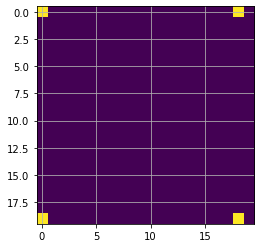

In [33]:
tmp=c_ct.copy()
for i in f_upleft: tmp[(i[0],i[1])] = 0.5
plt.imshow(tmp)
plt.grid()

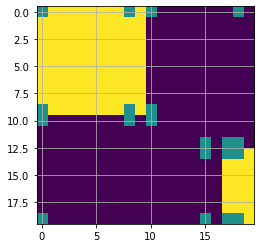

In [41]:
tmp=c_ct.copy()
for i in f_upleft: tmp[(i[0],i[1])] = 0.5
plt.imshow(tmp)
plt.grid()

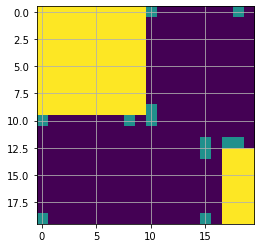

In [5]:
tmp=c_ct.copy()
for i in f_upleft: tmp[(i[0],i[1])] = 0.5
plt.imshow(tmp)
plt.grid()

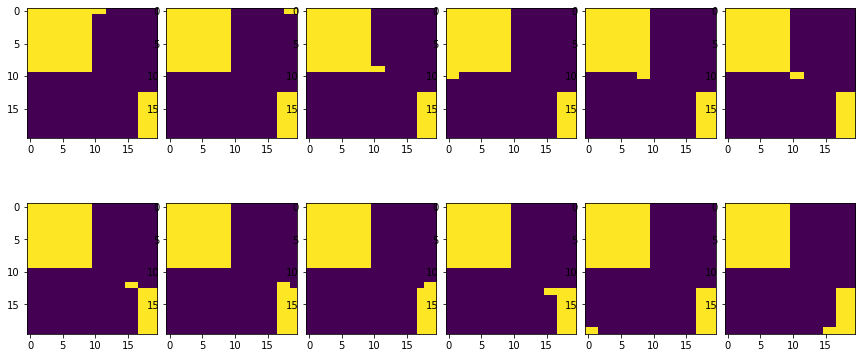

In [6]:
fig, axs = plt.subplots(2,6, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

# for i in range(10):
#     axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
#     axs[i].set_title(str(250+i))
i=0
for r,c in f_upleft:
    tmp=c_ct.copy()
    tmp[r:r+1,c:c+2] = 1
    axs[i].imshow(tmp);i+=1
    #fig.add_subplot(()).imshow(tmp)
    #fig.grid()